# ME460 Linkages - Prof. Mark Ganter
# 3 position dyad-standard  solver for Circle/Center-Pt.

posl2= d1*(-0.134 + 0.5*I)*exp(I*t1) + d2*(-0.245 + 0.656*I)*exp(I*t2) - 4.0 - 10.0*I
posl3= d1*(-0.5 + 0.866*I)*exp(I*t1) + d2*(-0.0952 + 0.426*I)*exp(I*t2) - 15.0 - 22.0*I

left 3pos solution r1,t1,r2,t2 = 27.9327455514831 -75.93948691325267 13.0479394728603 50.480602569635614
abs(posl2)= 0.00200
abs(posl3)= 0.00386

posr2= d3*(-1.45 - 0.891*I)*exp(I*t3) + d4*(-0.245 + 0.656*I)*exp(I*t4) - 4.0 - 10.0*I
posr3= d3*(-1.98 - 0.191*I)*exp(I*t3) + d4*(-0.0952 + 0.426*I)*exp(I*t4) - 15.0 - 22.0*I

right 3pos solution  r3,t3,r4,t4 = -19.2692932710007 427.26269706042507 -34.5350800250057 361.344415167792
abs(posr2)= 0.0246
abs(posr3)= 0.0151

phi2 = 29.999999999999996 phi3 = 59.99999999999999
psi2 = 243.0 psi3 = 191.0
gamma2 = 41.0 gamma3 = 25.2
del2 = 4.0 + 10.0*I
del3 = 15.0 + 22.0*I

R1 = ( 6.79 - 27.1*I )  ( 27.9 @ -75.94208666419041 degs)
R2 = ( 8.3 + 10.1*I )  ( 13.0 @ 50.47651864574159 degs)
R3 = ( -7.45 - 17.8*I )  ( 19.3 @ -112.73061433632499 degs)
R4 = ( -34.5 - 0.81*I )  ( 34.5 @ -

<IPython.core.display.Javascript object>


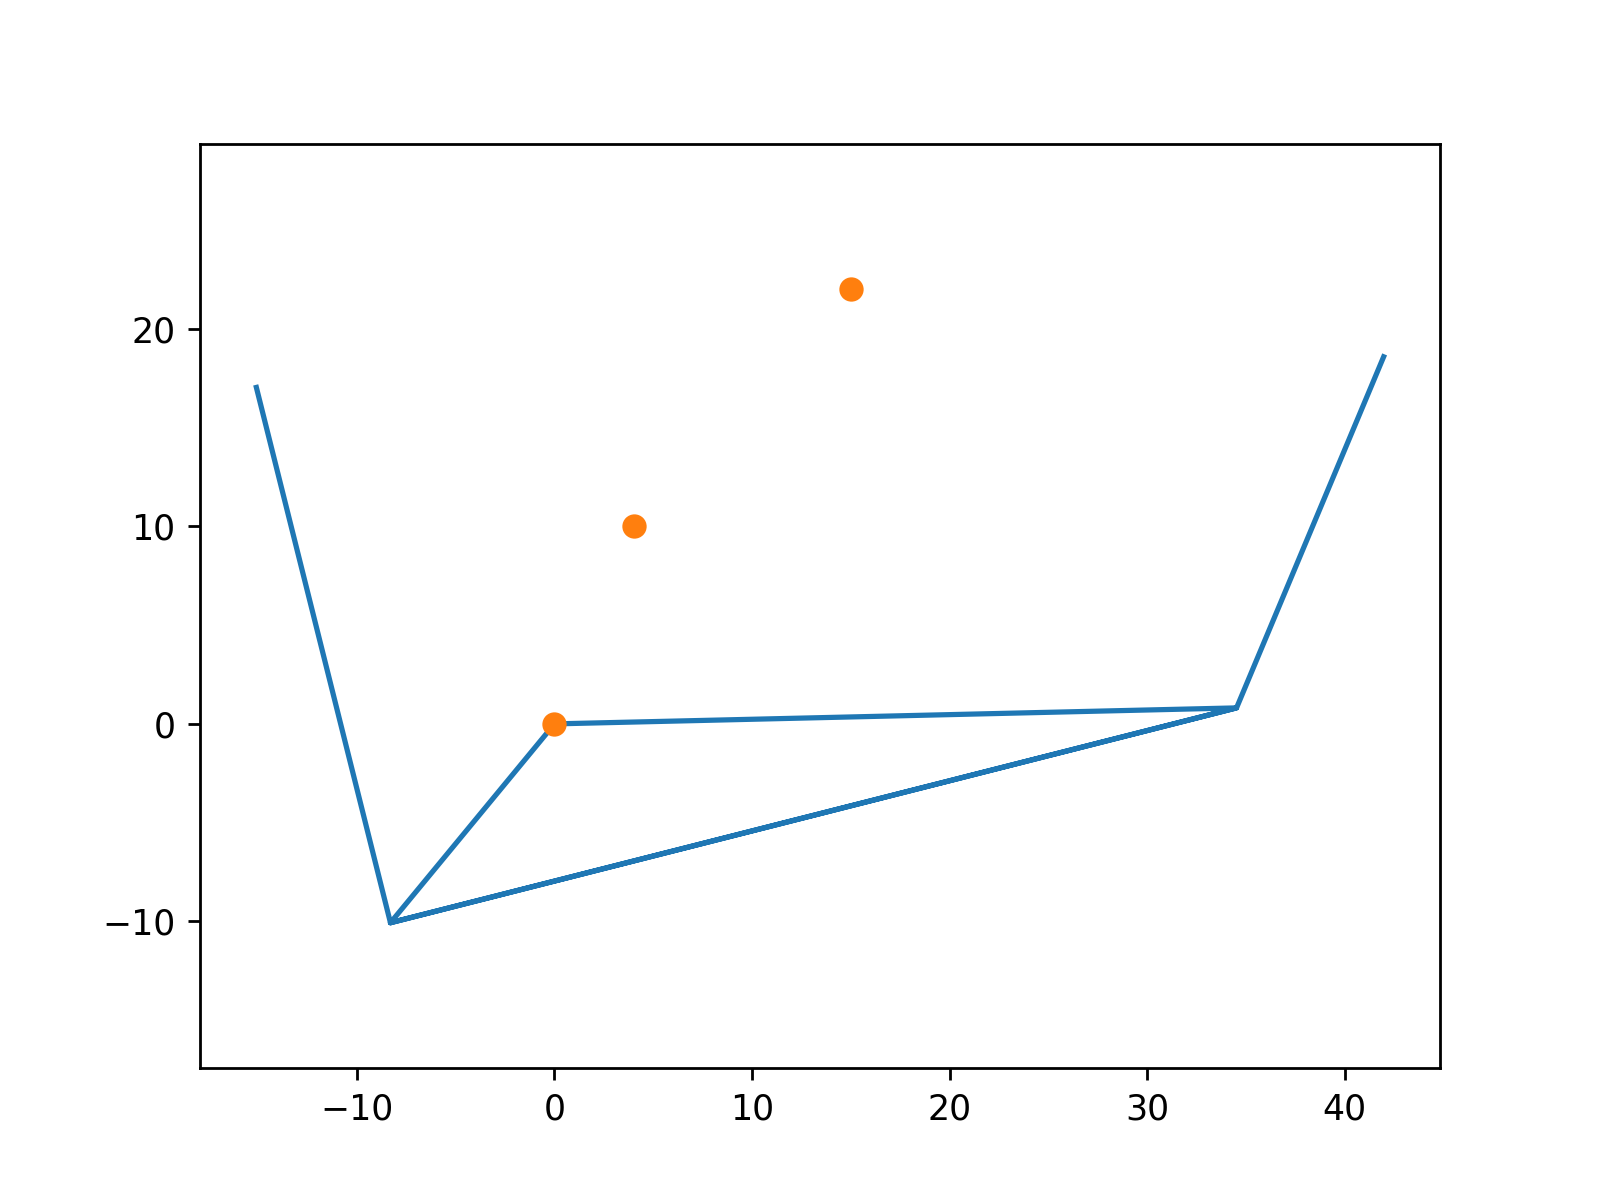

In [1]:
# Dyad-Standard Solver (for use with 4 pos circle/center-pt curves)

%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# plug in all your points C1-C4
# points from Chase's paper (Verified results 11/2020)
c1 = 0+I*0
c2 = 4+I*10
c3 = 15+I*22
c4 = 25+I*25

# compute deltas
del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

# plug in all your input angles p2-p4
# points from Chase's paper (Verified results 11/2020)
p2 = radians(30)
p3 = radians(60)
p4 = radians(90)

# plug in all your coupler angles g2-g4 (from the Circle/Center-Pt code/output)
g2 = radians(41)
g3 = radians(25.2)
#g4 = radians(#)

# plug in all your output angles s2-s4 (from the Circle/Center-Pt code/output)
s2 = radians(243.0)
s3 = radians(191.0)
#s4 = radians(#)

# LEFT SIDE #

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
#posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
#print("posl4=",N(posl4,3))
print()


#make your choice as to which two of the three dyad-standard equations to solve (let's try pos2 & pos3)
#choose some initial values for your unknowns
ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d2, t2), (5,radians(10),2 ,radians(-50)), 
            maxsteps=100, tol=0.01, verify=true)

print("left 3pos solution r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()


# RIGHT SIDE #

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3)-1) - del3
#posr4 = r3*(exp(I*s4)-1) + r4*(exp(I*g4)-1) - del4

print("posr2=",N(posr2,3))
print("posr3=",N(posr3,3))
#print("posr4=",N(posr4,3))
print()

#make your choice as to which two of the three dyad-standard equations to solve (let's try pos2 & pos3)
#choose some initial values for your unknowns
ans = nsolve((re(posr2),im(posr2),re(posr3),im(posr3)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
            maxsteps=100, tol=0.01, verify=true)

print("right 3pos solution  r3,t3,r4,t4 =",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(posr2)=",N(abs(posr2.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

# evaluate/compute vectors.
evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ans[0],t3:ans[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ans[2],t4:ans[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3))
print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

#compute the locations for Oa,A,Ob,B with respect to C1.
evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")


# call matplotlib routines for a line plot of linkage with C1-C3  
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
         [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
         [re(c1),re(c2),re(c3)],[im(c1),im(c2),im(c3)],'o')
ax.set_aspect('equal',adjustable='datalim')
plt.show()
